## Observations and Insights

## Dependencies and starter code

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Use left merge Mouse meta, study equal to mouse ID
combined_mouse = pd.merge(mouse_metadata, study_results, on=('Mouse ID'), how='left')

# study data completed.head()
combined_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 

sem_summary = combined_mouse.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :["mean", "median", "var", "std", "sem"]})
sem_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

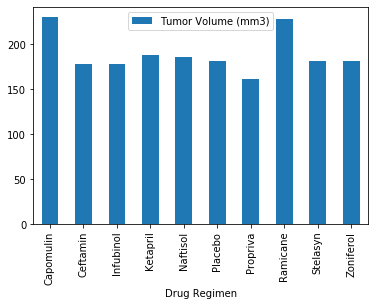

In [131]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimencount = combined_mouse.groupby(["Drug Regimen"]).count()
regimencount = regimencount.reset_index()
regimencount.plot.bar(x="Drug Regimen", y="Tumor Volume (mm3)")

<function matplotlib.pyplot.show(*args, **kw)>

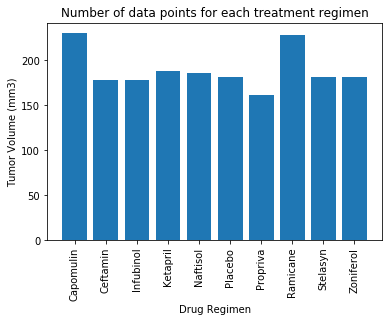

In [132]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Regimenplt = pd.Series(regimencount["Drug Regimen"])
Tumorplt = pd.Series(regimencount["Tumor Volume (mm3)"])

plt.xticks(rotation=90)

plt.title("Number of data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.bar(Regimenplt, Tumorplt)
plt.show

## Pie plots

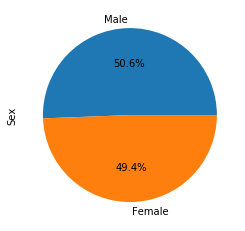

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderc = combined_mouse['Sex'].value_counts()
genderc.plot.pie(autopct='%1.1f%%')

<function matplotlib.pyplot.show(*args, **kw)>

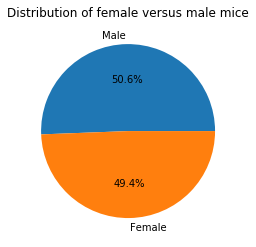

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male','Female']
plt.pie(genderc, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")
plt.show

## Quartiles, outliers and boxplots

In [135]:
# Need to find 4 promising treatment regimens

LowestTumorVolumemean = combined_mouse.groupby(['Drug Regimen']).mean()
LowestTumorVolumemean.reset_index()
LowestTumorVolumemean.sort_values(by='Drug Regimen', ascending=True)
LowestTumorVolumemean.head(4)



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872


In [136]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
finaltvol = pd.DataFrame(combined_mouse, columns = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen'])

tvol = finaltvol[finaltvol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

mousetvol = finaltvol.groupby(['Mouse ID','Drug Regimen'])['Timepoint','Tumor Volume (mm3)'].max()
mousetvol = mousetvol.reset_index()
mousetvol = mousetvol.sort_values('Tumor Volume (mm3)', ascending=False)
mousetvol.head()


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
137,o331,Ketapril,45,78.567014
113,l725,Naftisol,45,76.668817
148,p189,Ketapril,45,75.294936
118,m269,Stelasyn,45,75.123690
187,t724,Naftisol,45,75.113288


In [137]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
tmvolume = mousetvol["Tumor Volume (mm3)"]

quartiles = Tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


lower_bound_outliers = mousetvol[mousetvol["Tumor Volume (mm3)"] < lower_bound]
upper_bound_outliers = mousetvol[mousetvol["Tumor Volume (mm3)"] > upper_bound]

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


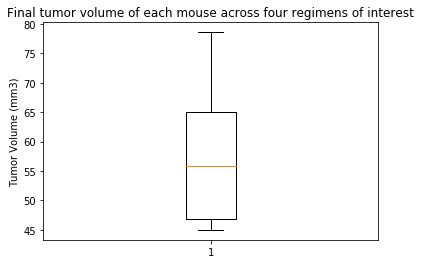

In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume of each mouse across four regimens of interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tmvolume)
plt.show()

## Line and scatter plots

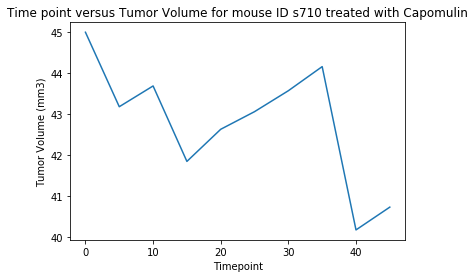

In [139]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulinline = finaltvol[finaltvol['Drug Regimen'].isin(["Capomulin"])]
RanMouse = Capomulinline.sample(1)['Mouse ID']
samplemouse = Capomulinline.loc[Capomulinline["Mouse ID"].isin([RanMouse.values[0]])]

plt.plot(samplemouse['Timepoint'], samplemouse['Tumor Volume (mm3)'])
plt.title("Time point versus Tumor Volume for mouse ID " + str(RanMouse.values[0])+ " treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

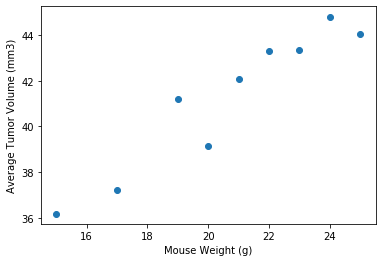

In [140]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = pd.DataFrame(combined_mouse, columns = ['Mouse ID','Tumor Volume (mm3)','Drug Regimen','Weight (g)'])
capweight = weight_df[weight_df['Drug Regimen'].isin(['Capomulin'])]
mweightg = capweight.groupby(['Weight (g)','Drug Regimen'])["Tumor Volume (mm3)"].mean()
mweightg = mweightg.reset_index()
plt.scatter(mweightg['Weight (g)'],mweightg['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.95


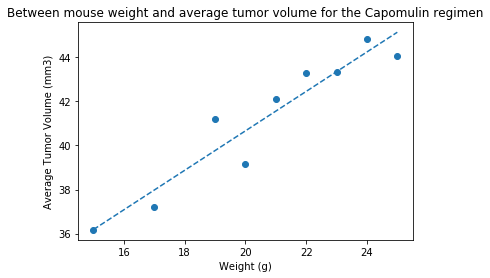

Linear Equation y=0.89x+22.76


In [163]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mweightg['Weight (g)'],mweightg['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")



ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(mweightg['Weight (g)'],mweightg['Tumor Volume (mm3)'])
ca_fit = ca_slope * mweightg['Weight (g)'] + ca_int
plt.scatter(mweightg['Weight (g)'],mweightg['Tumor Volume (mm3)'])
plt.plot(mweightg['Weight (g)'],ca_fit,"--")
plt.title("Between mouse weight and average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print("Linear Equation y="+str(round(ca_slope, 2))+"x+"+str(round(ca_int, 2)))